In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("/content/loan.csv")
df.head()  # displays first 5 rows of the data from file.
df.info()  #gives information of the data about RangeIndex, Columns, dtypes..
df.shape #gives number of rows and cols.
100*df.isnull().sum()/df.shape[0]
100*df.isnull().sum()/len(df)
100*df.isnull().mean()


<ipython-input-8-5ffd8c68d56a>:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/loan.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
...,...
tax_liens,0.098195
tot_hi_cred_lim,100.000000
total_bal_ex_mort,100.000000
total_bc_limit,100.000000


In [ ]:
df_cleaned = df.dropna(axis=1, how='all')
#df1= df.drop(columns=["tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","mths_since_last_record"], axis=1)

df_cleaned
df_cleaned.shape

(39717, 57)

In [ ]:
100*df_cleaned.isnull().mean()

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [ ]:
df1=df_cleaned.drop(columns=["next_pymnt_d","mths_since_last_record"],axis=1)
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [ ]:
100*df1.isnull().mean()

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [ ]:
mod=df1["emp_title"].mode()[0]
df1["emp_title"]=df1["emp_title"].fillna(mod)
mod=df1["emp_length"].mode()[0]
df1["emp_length"]=df1["emp_length"].fillna(mod)
mod=df1["emp_length"].mode()[0]
df1["last_pymnt_d"]=df1["last_pymnt_d"].fillna(mod)
100*df1.isnull().sum()/df1.shape[0]

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [ ]:
num_cols=["loan_amnt","annual_inc"]
cat_cols=["loan_status","home_ownership","term"]
extra_cols=["pymnt_plan","emp_title","loan_status"]


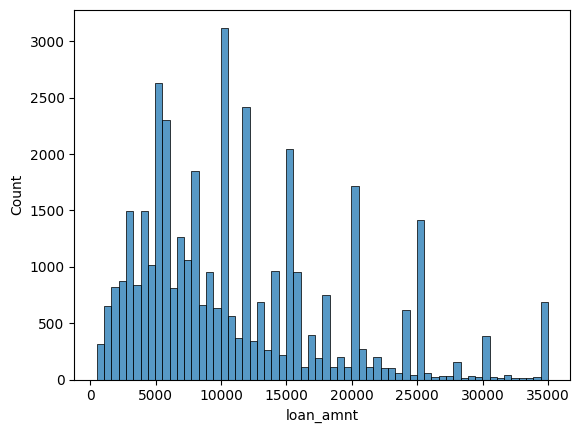

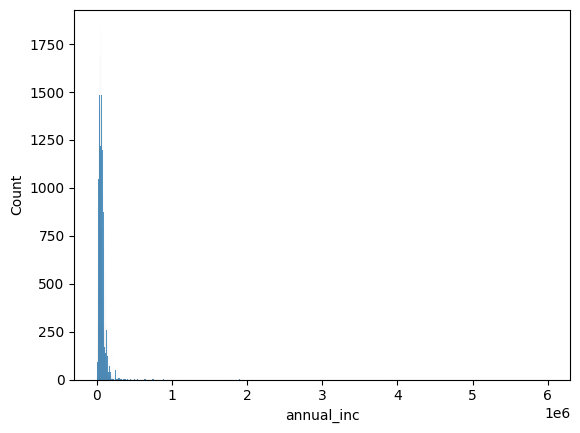

In [ ]:
#sns.histplot(x=df1["annual_inc"], bins=range(0,1500000,50000))
for col in num_cols:
  sns.histplot(x=df1[col])
  plt.show()

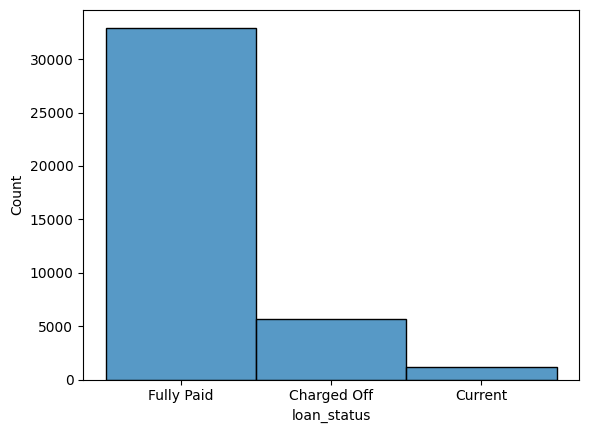

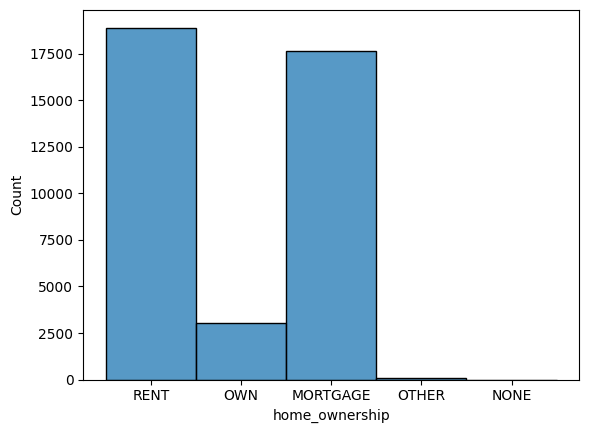

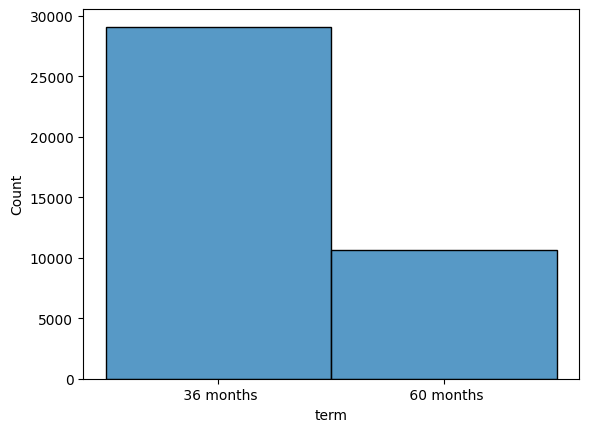

In [ ]:
#sns.countplot(x=df1["loan_status"])
for col in cat_cols:
  sns.histplot(x=df1[col])
  plt.show()

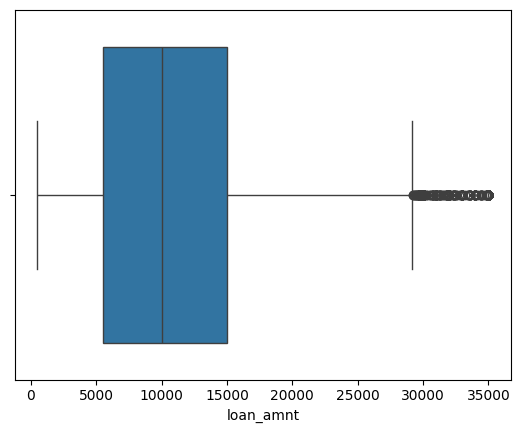

In [ ]:
sns.boxplot(x=df1["loan_amnt"])
df1["loan_amnt"].describe()
plt.show()

#num_cols=["loan_amnt","annual_inc"]
#cat_cols=["loan_status","home_ownership","term"]
#extra_cols=["pymnt_plan","emp_title","loan_status"]

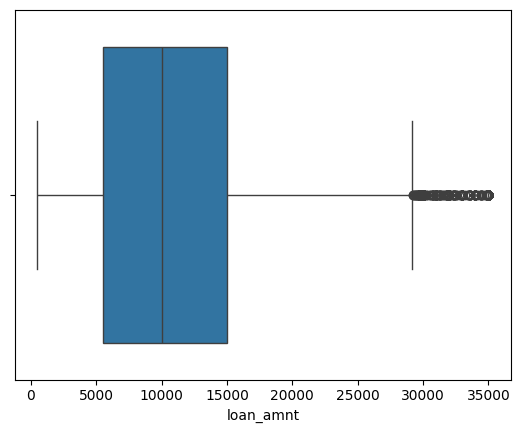

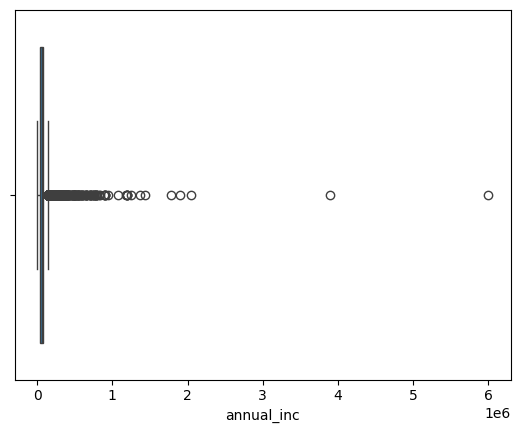

In [ ]:
for col in num_cols:
  sns.boxplot(x=df1[col])
  plt.show()

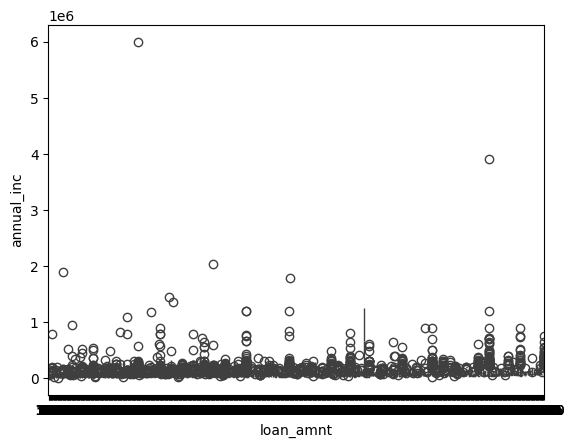

In [ ]:
sns.boxplot(x=df1["loan_amnt"],y=df1["annual_inc"])
plt.show()

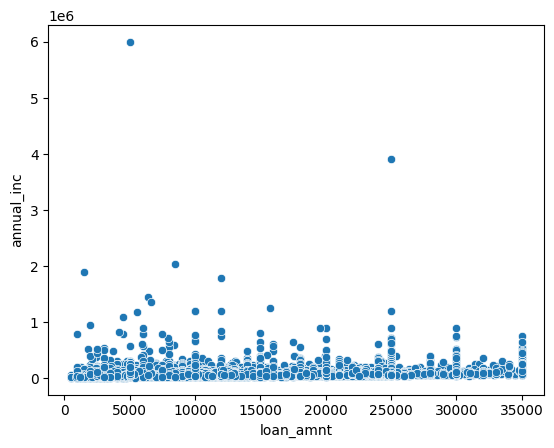

In [ ]:
sns.scatterplot(x=df1["loan_amnt"], y=df1["annual_inc"])
plt.show()

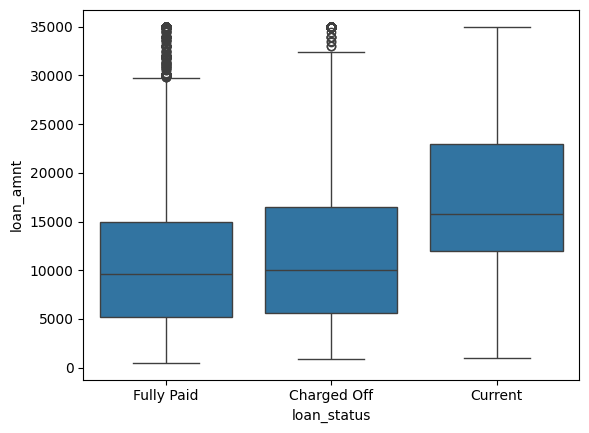

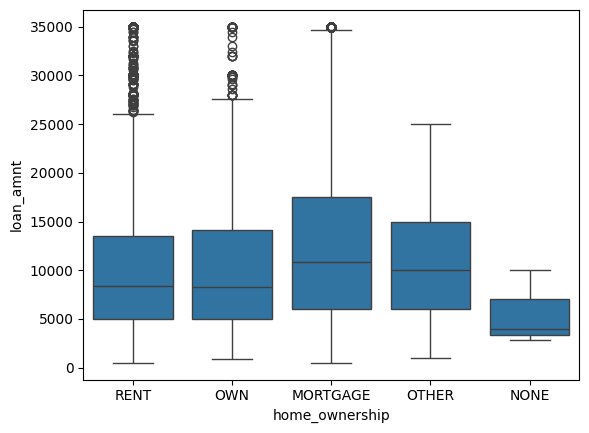

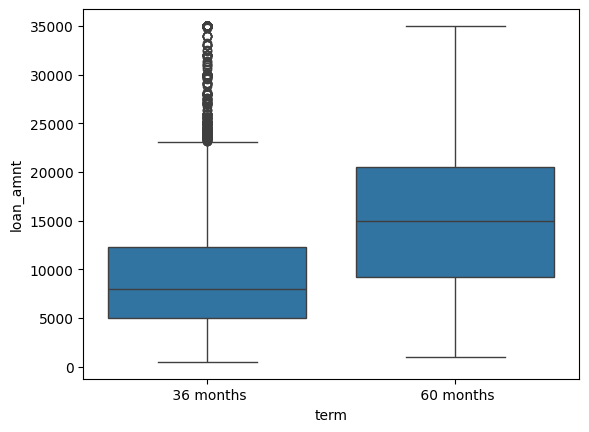

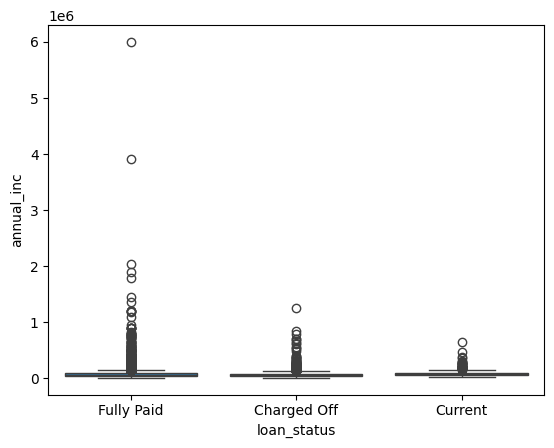

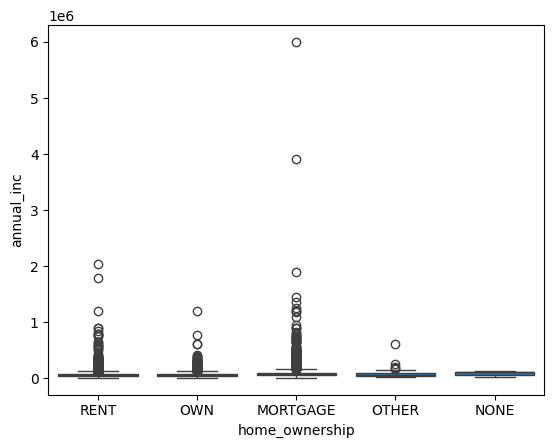

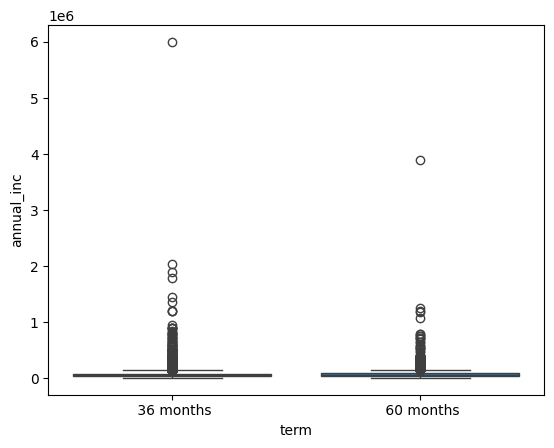

In [ ]:
for col1 in num_cols:
  for cat in cat_cols:
    sns.boxplot(x=df1[cat], y=df1[col1])
    plt.show()

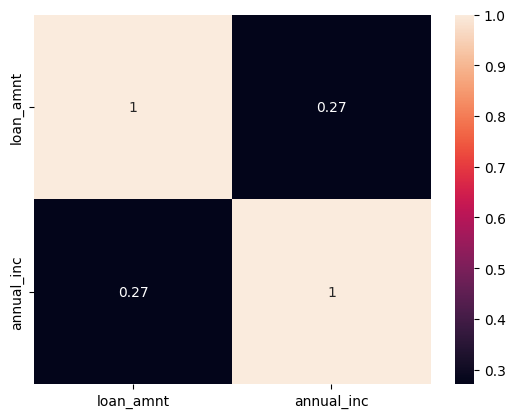

In [ ]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()